<a href="https://colab.research.google.com/github/nahumsa/Cellular-Automata/blob/master/2D%20Cellular%20Automata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2D Cellular Automata

In this notebook, I will show some examples of 2D Cellular Automata (CA).

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Types of neighbor connectivity

There are many types of neighboring connectivity. Let me show some examples

## 1.1) 4-Neighbor Cartesian

This is also known as *Von Neumann neighborhood*. In the image we have the neighbors of the center cell.

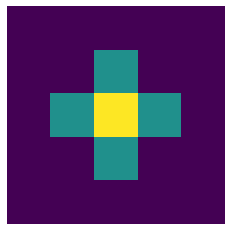

In [2]:
def neumann_neighborhood(matrix,i,j):
  """Von Neumann Neighborhood"""
  neighbors = [1, -1]
  for neighbors_indices in neighbors:
    matrix[i + neighbors_indices, j] = 1
    matrix[i, j + neighbors_indices] = 1
  return matrix

N = 5
M = np.zeros((N,N))
M[N//2,N//2] = 2
plt.imshow(neumann_neighborhood(M,N//2,N//2))
plt.axis('off')
plt.show()

## 1.2) 8-Neighbor Cartesian

This is also known as *Moore neighborhood*. In the image we have the neighbors of the center cell.

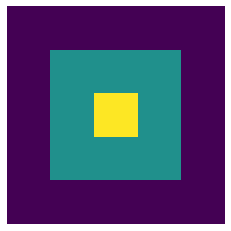

In [3]:
from itertools import permutations

def moore_neighborhood(matrix,i,j):
  """Moore Neighborhood"""
  neighbors = [1, -1]
  for neighbors_indices_1,neighbors_indices_2 in permutations(neighbors):    
    matrix[i + neighbors_indices_1, j] = 1
    matrix[i, j + neighbors_indices_1] = 1
    matrix[i + neighbors_indices_1, j + neighbors_indices_1] = 1
    matrix[i + neighbors_indices_1, j + neighbors_indices_2] = 1
  return matrix

N = 5
M = np.zeros((N,N))
M[N//2,N//2] = 2
plt.imshow(moore_neighborhood(M,N//2,N//2))
plt.axis('off')
plt.show()

## 1.3) 6-Neighbor Cartesian

In the image we have the neighbors of the center cell. This is topologically equivalent to a triangular lattice.

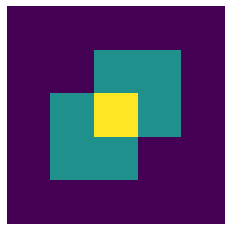

In [4]:
def six_neighborhood(matrix,i,j):
  """6-neighbor Neighborhood"""
  neighbors = [1, -1]
  for neighbors_indices in neighbors:
    matrix[i + neighbors_indices, j] = 1
    matrix[i, j + neighbors_indices] = 1
    matrix[i + neighbors_indices, j - neighbors_indices] = 1
  return matrix

N = 5
M = np.zeros((N,N))
M[N//2,N//2] = 2
plt.imshow(six_neighborhood(M,N//2,N//2))
plt.axis('off')
plt.show()

# 2) 2D Cellular Automaton

In this implementation we have a OOP implementation of the 2D Cellular Automaton, with all kinds of stencils that were citted before.

In [0]:
class CA2D:
  """Class that creates a 2D Cellular Automaton."""

  def __init__(self,N,time, stype, seed_index=None):
    self.image = self._evolution(N,time,stype,seed_index)

  def plot(self):
    plt.imshow(self.image, cmap='Greys')
    plt.axis('off')
    plt.show()

  def _stencil(self, stype):
    """Creates the stencil for the 2D Cellular Automaton."""
    if stype == '6':
      dx = np.array([1,0,1,-1,0,-1])
      dy = np.array([-1,-1,0,1,1,0])
    
    elif stype == '8': 
      dx = np.array([0,0,1,1,1,-1,-1,-1])
      dy = np.array([1,-1,-1,0,1,-1,0,1])
    
    elif stype == '4': 
      dx = np.array([0,0,1,-1])
      dy = np.array([1,-1,1,-1])


    else:
      raise Exception('Not a valid stencil type.')
  
    return dx, dy
  
  def _evolution(self, N, time, stype, seed_index):
    """ Evolution 2D Cellular automaton.

    Parameters
    -----------------------------------------
    N(int): Size of the grid.
    time(int): Number of iterations.
    stype(float): Stencil type for the neighbor connectivity. 
                  Ex.: '6', '4', '8'.
    seed_index(tuple): Index where you want to start the seed
                      if None, will set on center.
                      (default=None)

    """
    
    
    dx, dy = self._stencil(stype=stype)

    image = np.zeros((N,N), dtype='int')
    
    if not seed_index:
      seed_index = (N//2, N//2)

    image[seed_index] = 1

    n_neighbor = len(dx)
    for iteration in range(1,time):

      update= np.zeros((N,N), dtype='int')

      for i in range(1, N-1):
        for j in range(1, N-1):

          cumul = 0
          
          for k in range(0,n_neighbor):
            cumul += image[i + dx[k], j + dy[k]]
          
          if image[i,j]== 0 and cumul == 1:
            update[i,j] = 1        
      
      image+=update
    
    return image

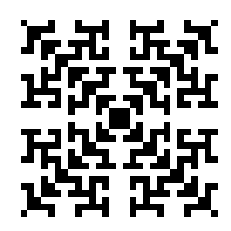

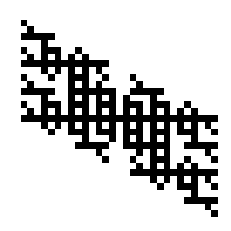

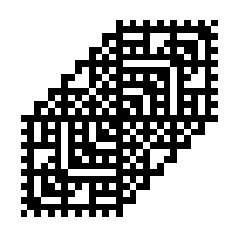

In [24]:
image = CA2D(N=32, time=15, stype='8')
image.plot()

image = CA2D(N=32, time=15, stype='4')
image.plot()

image = CA2D(N=32, time=15, stype='6')
image.plot()

# 3) 2D Cellular Automata Zoo

Let's focus now on the case for all 8-neighbor rules. We need a activation rules, we define it as: a node becomes active if either $n_1$ or $n_2$ neighborings are active. We also include the starting seed as $s$, this sums up as:

$$
(n_1, n_2) + s \ , \ 1 \leq n_1,n_2 \leq 8 \ , \ n_1 < n_2
$$

Let's add this as a module on our python class.


In [0]:
class CA2D:
  """Class that creates a 2D Cellular Automaton.
    
  Initial Parameters
  -----------------------------------------
  N(int): Size of the grid.
  time(int): Number of iterations.
  n_act(list or int): Number of actives cells in order to node
                      to be active.
  stype(float): Stencil type for the neighbor connectivity. 
                Ex.: '6', '4', '8'. (default='8')  
  
  """

  def __init__(self, N, time, n_act, s, stype='8'):    
    self.n_active = n_act    
    
    self.N = N
    
    self.dx, self.dy = self._stencil(stype=stype)

    self.image = np.zeros((N,N), dtype='int')        
    
    for i in range(s):      
      x = N//2
      y = N//2 + i
      self.image[x,y] = 1
    
    fig = plt.figure(figsize=(16,10))
    gs = fig.add_gridspec(1, 2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])

    self.plot('Initial Seed', ax=ax1)
    
    self._evolution(N,time,stype)
    
    self.plot('After Evolution', ax=ax2)
    
    plt.show()

  def plot(self, title, ax=None):
    if not ax:
      plt.imshow(self.image, cmap='Greys')
      plt.title(title, size=16)
      plt.axis('off')
      plt.show()
    
    else:
      ax.imshow(self.image, cmap='Greys')
      ax.set_title(title, size=16)
      ax.axis('off')      

  def _stencil(self, stype):
    """Creates the stencil for the 2D Cellular Automaton."""
    if stype == '6':
      dx = np.array([1,0,1,-1,0,-1])
      dy = np.array([-1,-1,0,1,1,0])
    
    elif stype == '8': 
      dx = np.array([0,0,1,1,1,-1,-1,-1])
      dy = np.array([1,-1,-1,0,1,-1,0,1])
    
    elif stype == '4': 
      dx = np.array([0,0,1,-1])
      dy = np.array([1,-1,1,-1])


    else:
      raise Exception('Not a valid stencil type.')
  
    return dx, dy
  
  def _rule(self, i, j):
    """Return true values if sattisfies the number of 
    active cells.
    
    """
    #Check if it is a int

    if type(self.n_active) == int:      
      return self.cumul == self.n_active

    else:
      return self.cumul in self.n_active

  def _evolution(self, N, time, stype):
    """ Evolution 2D Cellular automaton.

    Parameters
    -----------------------------------------
    N(int): Size of the grid.
    time(int): Number of iterations.
    stype(float): Stencil type for the neighbor connectivity. 
                  Ex.: '6', '4', '8'.
    seed_index(tuple): Index where you want to start the seed
                      if None, will set on center.
                      (default=None)

    """
    
    n_neighbor = len(self.dx)

    for iteration in range(1,time):

      update= np.zeros((N,N), dtype='int')

      for i in range(1, N-1):
        for j in range(1, N-1):

          self.cumul = 0
          
          for k in range(0,n_neighbor):
            self.cumul += self.image[i + self.dx[k], j + self.dy[k]]
          
          if self._rule(i,j) and self.image[i,j] == 0:
            update[i,j] = 1        
      
      self.image += update

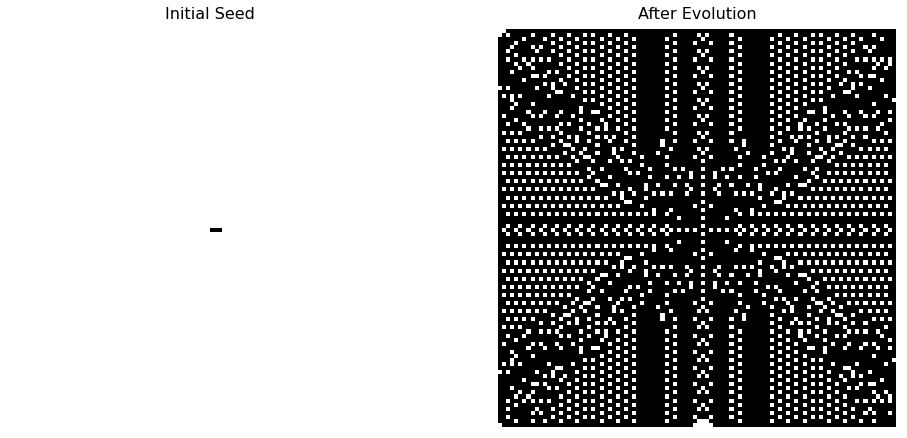

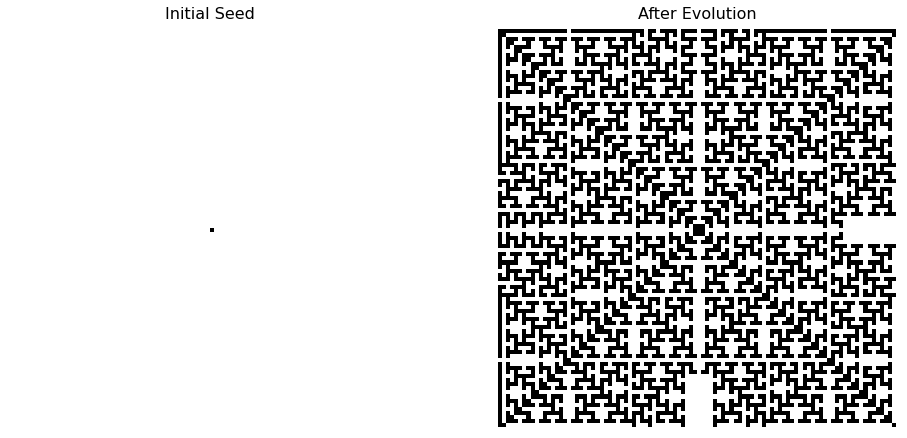

In [104]:
image = CA2D(N=100, time=100, n_act=[2,4], s=3)
image = CA2D(N=100, time=100, n_act=[1], s=1)